In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np
import pickle

from scipy import interpolate
interpolate.interpolate.RegularGridInterpolator = interpolate.RegularGridInterpolator

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from dm21cm.dm_params import DMParams

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [2]:
sys.path.append(os.environ['DH_DIR'])
from main import evolve as dh_evolve

In [3]:
run_name = 'xc_ee_lifetime25_default'
tf_version = 'zf01'

# ee
dm_params = DMParams(
    mode = 'decay',
    primary = 'elec_delta',
    m_DM = 1e8, # [eV]
    lifetime = 1e25, #[s]
)

soln = dh_evolve(
    DM_process=dm_params.mode, mDM=dm_params.m_DM,
    primary=dm_params.primary,
    sigmav=dm_params.sigmav, lifetime=dm_params.lifetime,
    struct_boost=dm_params.struct_boost,
    start_rs=3000, end_rs=4.+1, coarsen_factor=12, verbose=1,
    # use fake reionization to get case-A recomb. coeff.
    reion_switch=True, reion_rs=47.,
    photoion_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    photoheat_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    # cross_check_21cmfast=True,
    # cross_check_21cmfast_tf_version=tf_version,
    # debug_inject_ST_xray=False,
)

pickle.dump(soln, open(f"{WDIR}/outputs/dh/{run_name}_soln.p", 'wb'))

****** Loading transfer functions... ******
Using data at /n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1
    for propagating photons...  

 Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading time: 30.131 s


  0%|          | 1/534.0 [00:00<02:31,  3.52it/s]

Initialization time: 0.451 s


100%|██████████| 534/534.0 [02:29<00:00,  3.57it/s]

Main loop time: 149.177 s


In [4]:
import dm21cm.physics as phys

Text(0.5, 1.0, '$\\chi\\rightarrow ee$, lifetime=1e25 s')

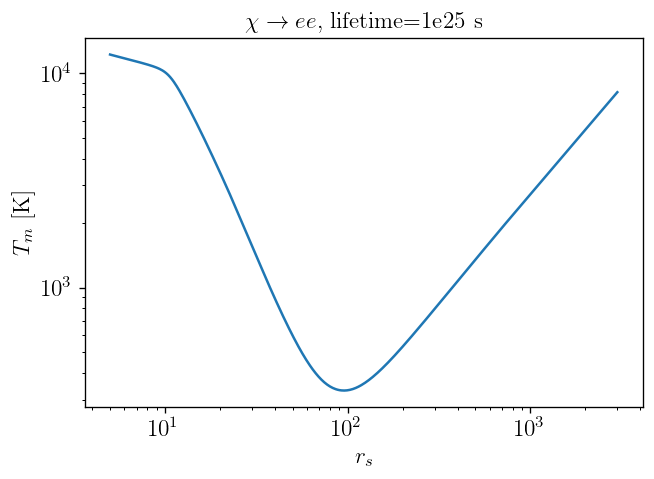

In [15]:
plt.plot(soln['rs'], soln['Tm'] / phys.kB)
plt.loglog()
plt.xlabel(r'$r_s$')
plt.ylabel(r'$T_m$ [K]')
plt.title(r'$\chi\rightarrow ee$, lifetime=1e25 s')

In [ ]:
soln['x'][:, 1]

Text(0.5, 1.0, '$\\chi\\rightarrow ee$, lifetime=1e25 s')

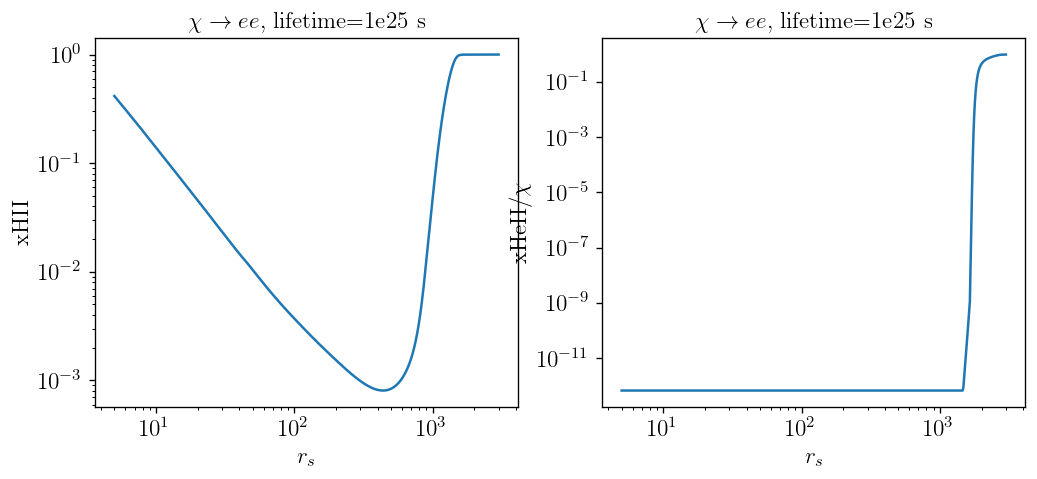

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

ax = axs[0]
ax.plot(soln['rs'], soln['x'][:, 0], label='xHII')
ax.loglog()
ax.set_xlabel(r'$r_s$')
ax.set_ylabel(r'xHII')
ax.set_title(r'$\chi\rightarrow ee$, lifetime=1e25 s')

ax = axs[1]
ax.plot(soln['rs'], soln['x'][:, 1] / phys.chi, label=r'xHeII/$\chi$')
ax.loglog()
ax.set_xlabel(r'$r_s$')
ax.set_ylabel(r'xHeII$/\chi$')
ax.set_title(r'$\chi\rightarrow ee$, lifetime=1e25 s')

In [8]:
import darkhistory.physics as dh_phys

In [9]:
from darkhistory.history.reionization import alphaA_recomb

In [11]:
T_arr = np.geomspace(1e3, 1e5, 100) * phys.kB
alpha_arr = [alphaA_recomb('HII', T) for T in T_arr]

Text(0, 0.5, '$\\alpha_A$ [cm$^3$/s]')

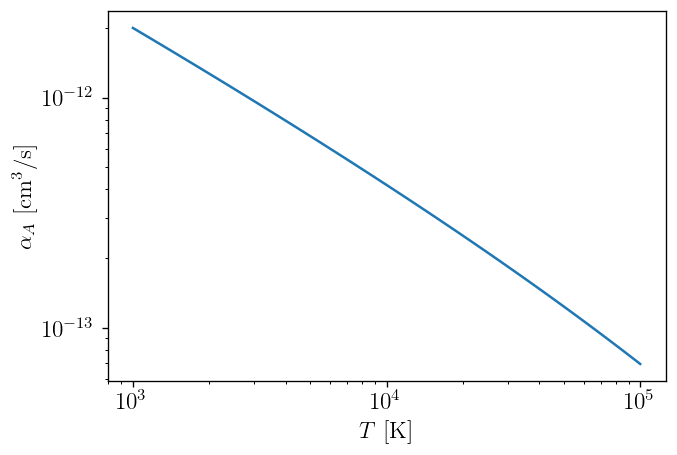

In [14]:
plt.plot(T_arr / phys.kB, alpha_arr)
plt.loglog()
plt.xlabel(r'$T$ [K]')
plt.ylabel(r'$\alpha_A$ [cm$^3$/s]')

In [10]:
alphaA_recomb?

Signature: alphaA_recomb(species, T)
Docstring:
Case-A recombination coefficient.  

Parameters
----------
species : {'HII', 'HeIIr', 'HeIId', 'HeIII'}
    Species of interest. 
T : float
    Matter temperature in eV. 

Returns
-------
float
    Case-A recombination coefficient in cm^3/s. See astro-ph/0607331.
File:      ~/darkhistory/DarkHistory/darkhistory/history/reionization.py
Type:      function